***Exploring the Relationship Between Earth Temperature and Cyclonic Storms***

Historic data suggests that the occurrence and intensity of cyclonic storms (hurricanes, typhoons, and tornados) increase as the Earth's temperature rises. Our task is to analyze this relationship and present our findings in an accessible and engaging way suitable for a high-school earth science class.

***I. Data Collection:***

**I.1. Load both datasets:**

In [14]:
import pandas as pd

# URL of the CSV file
url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"

# Load the CSV content into a pandas DataFrame
temp_data = pd.read_csv(url, header=1)

# Display the first few rows of the DataFrame
print(temp_data.head())

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.19 -0.25  -.10  -.17  -.11  -.22  -.19  -.11  -.15  -.24  -.23   
1  1881 -0.21 -0.15   .02   .04   .05  -.20  -.01  -.05  -.16  -.22  -.19   
2  1882  0.15  0.13   .04  -.17  -.15  -.23  -.17  -.08  -.15  -.24  -.17   
3  1883 -0.30 -0.37  -.13  -.19  -.18  -.08  -.08  -.15  -.23  -.12  -.25   
4  1884 -0.14 -0.09  -.37  -.40  -.34  -.35  -.31  -.28  -.27  -.25  -.34   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  -.18  -.18   ***   ***  -.12  -.17  -.21  
1  -.08  -.10  -.10  -.18   .04  -.08  -.19  
2  -.37  -.12  -.09   .07  -.09  -.16  -.19  
3  -.12  -.18  -.20  -.35  -.17  -.10  -.20  
4  -.31  -.29  -.27  -.11  -.37  -.32  -.29  


In [10]:
import pandas as pd

# URL of the CSV file
url1 = "https://www.spc.noaa.gov/wcm/data/1950-2023_actual_tornadoes.csv"

# Load the CSV content into a pandas DataFrame
tornado_data = pd.read_csv(url1)

# Display the first few rows of the DataFrame
print(tornado_data.head())

    om    yr  mo  dy        date      time  tz  st  stf  stn  ...   len  wid  \
0  192  1950  10   1  1950-10-01  21:00:00   3  OK   40   23  ...  15.8   10   
1  193  1950  10   9  1950-10-09  02:15:00   3  NC   37    9  ...   2.0  880   
2  195  1950  11  20  1950-11-20  02:20:00   3  KY   21    1  ...   0.1   10   
3  196  1950  11  20  1950-11-20  04:00:00   3  KY   21    2  ...   0.1   10   
4  197  1950  11  20  1950-11-20  07:30:00   3  MS   28   14  ...   2.0   37   

   ns  sn  sg   f1  f2  f3  f4  fc  
0   1   1   1   25   0   0   0   0  
1   1   1   1   47   0   0   0   0  
2   1   1   1  177   0   0   0   0  
3   1   1   1  209   0   0   0   0  
4   1   1   1  101   0   0   0   0  

[5 rows x 29 columns]


**I.2. Cleaning and combining the data:**

In [22]:
# Filter temperature data for the years 1950 to 2023
temperature_data_filtered = temp_data[(temp_data['Year'] >= 1950) & (temp_data['Year'] <= 2023)]

# Convert the temperature columns to numeric, coercing any errors to NaN
temperature_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for col in temperature_columns:
    temperature_data_filtered.loc[:, col] = pd.to_numeric(temperature_data_filtered[col], errors='coerce')

# Convert the 'year' column to integer in the tornado data
tornado_data['yr'] = tornado_data['yr'].astype(int)

# Aggregate tornado data by year
tornado_data_aggregated = tornado_data.groupby('yr').size().reset_index(name='tornado_count')

# Merge the temperature and tornado data on the 'Year' column
combined_data = pd.merge(temperature_data_filtered, tornado_data_aggregated, left_on='Year', right_on='yr')

# Drop the redundant 'yr' column after merging
combined_data = combined_data.drop(columns=['yr'])

# Display the first few rows of the combined dataset
print(combined_data.head())

# Save the combined dataset to a CSV file
combined_data.to_csv('combined_temperature_tornado_data.csv', index=False)

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1950 -0.26 -0.27 -0.08 -0.21 -0.11 -0.05 -0.08 -0.16 -0.11  -0.2 -0.34   
1  1951 -0.34 -0.41  -0.2 -0.14   0.0 -0.06 -0.01  0.06  0.05  0.08 -0.01   
2  1952  0.11  0.11 -0.08  0.03 -0.03 -0.03  0.04  0.05  0.07   0.0 -0.13   
3  1953  0.07  0.15  0.11   0.2  0.12  0.12  0.01  0.05  0.04  0.08 -0.03   
4  1954 -0.24 -0.10 -0.15 -0.14  -0.2 -0.19 -0.18 -0.17  -0.1 -0.02  0.08   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  tornado_count  
0 -0.22  -.17  -.17  -.24  -.13  -.10  -.22            201  
1  0.16  -.07  -.10  -.33  -.12  -.01   .04            260  
2 -0.02   .01   .03   .13  -.03   .02  -.02            240  
3  0.05   .08   .08   .07   .14   .06   .03            421  
4 -0.18  -.13  -.11  -.10  -.16  -.18  -.01            550  


In [81]:
# Calculate the average temperature for each year
combined_data['avg_temp'] = combined_data[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)

# Ensure 'avg_temp' and 'tornado_count' columns are numeric and handle infinite values
combined_data['avg_temp'] = pd.to_numeric(combined_data['avg_temp'], errors='coerce').replace([np.inf, -np.inf], np.nan)
combined_data['tornado_count'] = pd.to_numeric(combined_data['tornado_count'], errors='coerce').replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values in 'avg_temp' or 'tornado_count'
combined_data = combined_data.dropna(subset=['avg_temp', 'tornado_count'])

# Display the first few rows to verify
print(combined_data[['Year', 'avg_temp', 'tornado_count']].head())

   Year  avg_temp  tornado_count
0  1950 -0.174167            201
1  1951 -0.068333            260
2  1952  0.010000            240
3  1953  0.080833            421
4  1954 -0.132500            550


***II. Visualization:***

**II.1. Creating a scatter plot with the regression line:**

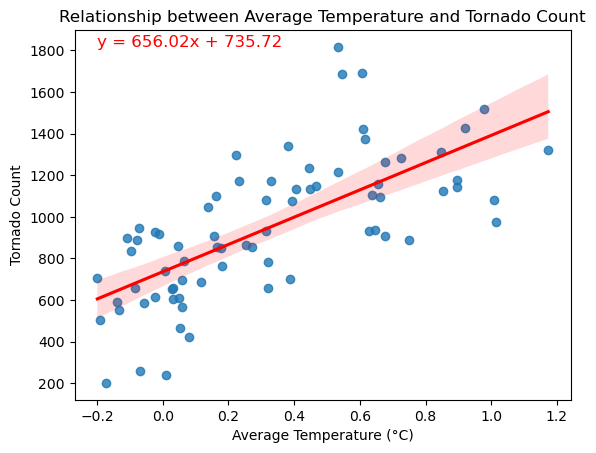

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot the scatter plot with a regression line
sns.regplot(x='avg_temp', y='tornado_count', data=combined_data, line_kws={'color': 'red'})

# Calculate the regression line equation
slope, intercept = np.polyfit(combined_data['avg_temp'], combined_data['tornado_count'], 1)
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Annotate the plot with the equation
plt.text(x=combined_data['avg_temp'].min(), y=combined_data['tornado_count'].max(), s=equation, fontsize=12, color='red')

plt.title('Relationship between Average Temperature and Tornado Count')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Tornado Count')
plt.show()

In [86]:
# Calculate the correlation between average temperature and tornado count
correlation = combined_data['avg_temp'].corr(combined_data['tornado_count'])
print(f'Correlation between average temperature and tornado count: {correlation:.2f}')

Correlation between average temperature and tornado count: 0.69


**II.2. Timeline Comparing Average Temperatures to Storm Intensity Trends:**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

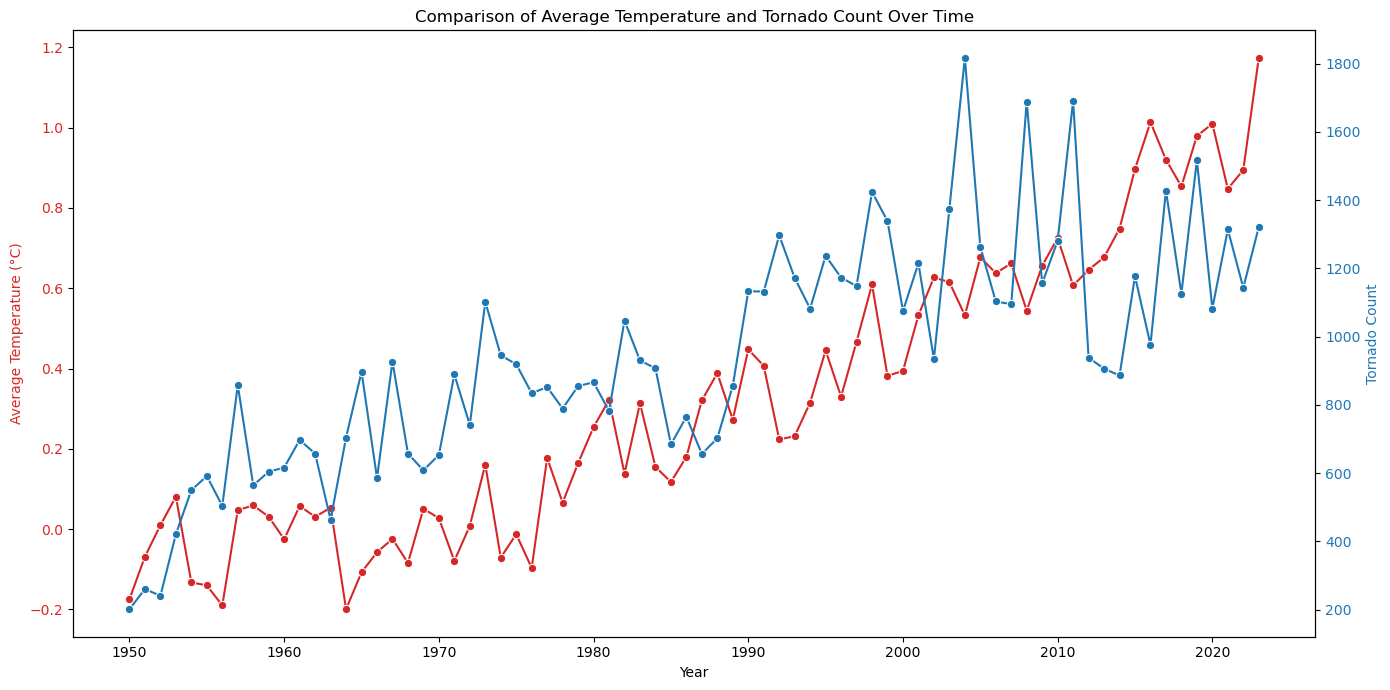

In [97]:
# Plot the comparison chart
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color=color)
sns.lineplot(data=combined_data, x='Year', y='avg_temp', ax=ax1, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Tornado Count', color=color)
sns.lineplot(data=combined_data, x='Year', y='tornado_count', ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparison of Average Temperature and Tornado Count Over Time')
fig.tight_layout()
plt.show()